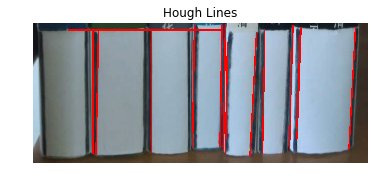

In [125]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from matplotlib import image as image

I = image.imread('4_1.jpg') 

G = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)

# Canny Edge Detection:
Threshold1 = 150;
Threshold2 = 250;
FilterSize = 5
E = cv2.Canny(G, Threshold1, Threshold2, FilterSize)

Rres = 1
Thetares = 1*np.pi/180
Threshold = 1
minLineLength = 1
maxLineGap = 100
lines = cv2.HoughLinesP(E,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 200,maxLineGap = 50)
N = lines.shape[0]
for i in range(N):
    x1 = lines[i][0][0]
    y1 = lines[i][0][1]    
    x2 = lines[i][0][2]
    y2 = lines[i][0][3]    
    cv2.line(I,(x1,y1),(x2,y2),(255,0,0),2)

plt.figure(),plt.imshow(I),plt.title('Hough Lines'),plt.axis('off')
plt.show()

   (90, 1, 4)
   (22, 4)


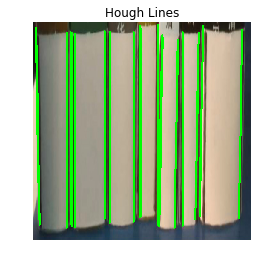

In [62]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("4_1.jpg")
img = cv2.resize(img, (512, 512))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 200, 150, apertureSize = 3)
 
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, maxLineGap=250)
print('  ',lines.shape)
proposal_lines = []
for line in lines:
    x1, y1, x2, y2 = line[0]
    horizontal_distance = abs(x1 - x2)
    vertical_distance = abs(y1-y2)
    #430--line length
    if horizontal_distance<10 and vertical_distance>430:
        proposal_lines.append(line[0]) 
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 3)
        

proposal_lines = np.array(proposal_lines)
print('  ',proposal_lines.shape)
# cv2.imshow("Edges", edges)
# cv2.imshow("Image", img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.figure(),plt.imshow(img),plt.title('Hough Lines'),plt.axis('off')
plt.show()

# vertical-line-detection

   (7, 1, 2)
   15.0


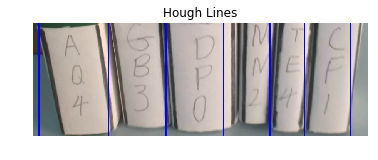

In [153]:
import cv2
import numpy as np

img = cv2.imread('ocr_1.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,250)

lines = cv2.HoughLines(edges, 30,  np.pi*3/4, 300)
print('  ',lines.shape)
start_line = lines[0][0][0]
print('  ', lines[6][0][0])

count = 0
for line in lines:
    a = np.cos(line[0][1])
    b = np.sin(line[0][1])
    x0 = a*line[0][0]
    y0 = b*line[0][0]
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
#     if  abs(line[0][0]-start_line)<30:
#         if count>=1:
#             count += 1
#             continue
#         else:
#             cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
#             count += 1
#     else:
#         start_line = line[0][0]
#         cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
#         count += 1
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.figure(),plt.imshow(img),plt.title('Hough Lines'),plt.axis('off')
plt.show()
#cv2.imwrite('houghlines3.jpg',img)